# Music Genre Classifier using Classical ML Approch

# Our project is mainly consisting of 6 steps

1.   Getting the data
2.   Extracting and selecting the features
3.   Creating the CSV file that we'll work on and exploring it
4.   Applying ML Algorithms Random forest and SVM 
5.   Creating a .pkl file to predict a new song
6.   The simplest Console Interface ever for you to test the Model

## So let's get started...

### The project objective is to predict the music genre/label based on the spectral features of the physical wave itself.

## **Libraries used**

*   Librosa 
*   Pandas
*   Numpy
*   Scikit-Learn
*   Seaborn
*   Pickle
*   matplotlib
*   OS

## We used the GTZAN music dataset containig 1000 songs, 10 genres, each song is 30 seconds, The tracks are all 22050Hz Mono 16-bit audio files in .wav format.


In [140]:
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
from sklearn.metrics import classification_report

### After extracting the features from the original GTZan data set "songs", I'll use it as a csv file

In [166]:
df=pd.read_csv('data.csv')
df.head()

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.505871,-0.784343,-0.381408,-0.691147,-0.107291,0.349902,-0.187280,-0.572265,-0.236668,-0.455356,...,-0.114378,-0.174782,-0.716931,0.379757,-0.826331,0.065192,-0.802478,0.243325,-0.609704,blues
1,-0.789556,-0.726759,-0.559681,-0.463433,-0.214652,0.274741,-0.139501,-0.414690,-0.333817,0.018836,...,0.103460,0.112254,-0.611377,0.466185,-0.771335,0.270596,-0.480038,0.286445,-0.546068,blues
2,-0.590099,-0.556617,-0.500726,-0.520669,0.110841,0.342202,-0.352145,-0.704373,-0.413241,-0.486896,...,-0.166338,-0.354216,-0.664704,0.180107,-0.751552,-0.094467,-0.647450,-0.182938,-0.530300,blues
3,-0.943024,-0.920130,-0.872967,-0.743929,-0.069544,0.043430,-0.635685,-0.596014,-0.772659,-0.550906,...,-0.747465,0.293044,-0.776384,0.104992,-0.925492,0.202960,-0.847504,-0.116092,-0.708645,blues
4,-0.205440,-0.400993,-0.236112,-0.243814,0.190382,0.270769,-0.310327,-0.532099,-0.198146,-0.129946,...,0.135571,-0.436034,-0.672466,-0.180337,-0.717212,0.166494,-0.222193,-0.367990,-0.278997,blues


### Genre labels are string so let's convert them, also I'll not use the genre disco as it's noisy

In [167]:
le= LabelEncoder()
labels=['blues','classical','country','hiphop','jazz','metal','pop','reggae','rock']
df=df[df.genre != 'disco']
df['genre']=le.fit_transform(df['genre'])

In [156]:
df.genre.value_counts()

8    100
7    100
6    100
5    100
4    100
3    100
2    100
1    100
0    100
Name: genre, dtype: int64

In [155]:
df.shape

(900, 37)

In [135]:
df.columns

Index(['meanZCR', 'stdZCR', 'meanSpecCentroid', 'stdSpecCentroid',
       'meanSpecContrast', 'stdSpecContrast', 'meanSpecBandwidth',
       'stdSpecBandwidth', 'meanSpecRollof', 'stdSpecRollof', 'meanMFCC_1',
       'stdMFCC_1', 'meanMFCC_2', 'stdMFCC_2', 'meanMFCC_3', 'stdMFCC_3',
       'meanMFCC_4', 'stdMFCC_4', 'meanMFCC_5', 'stdMFCC_5', 'meanMFCC_6',
       'stdMFCC_6', 'meanMFCC_7', 'stdMFCC_7', 'meanMFCC_8', 'stdMFCC_8',
       'meanMFCC_9', 'stdMFCC_9', 'meanMFCC_10', 'stdMFCC_10', 'meanMFCC_11',
       'stdMFCC_11', 'meanMFCC_12', 'stdMFCC_12', 'meanMFCC_13', 'stdMFCC_13',
       'genre'],
      dtype='object')

### separate target from features,..

In [157]:
X=df.drop('genre',axis=1)
y=df['genre']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10,stratify=y)

In [119]:
X_train.shape

(900, 36)

In [79]:
y_train.value_counts()

9    90
8    90
7    90
6    90
5    90
4    90
3    90
2    90
1    90
0    90
Name: genre, dtype: int64

In [120]:
y_test.value_counts()

9    10
8    10
7    10
6    10
5    10
4    10
3    10
2    10
1    10
0    10
Name: genre, dtype: int64

### Support vector machine with gridsearch

In [105]:
svm=SVC()
parameters = [
  {'C': [1, 10, 100, 200], 'gamma': [0.001,0.08,0.01, 0.0001], 'kernel': ['rbf','linear']},
]
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 200],
                          'gamma': [0.001, 0.08, 0.01, 0.0001],
                          'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
clf.best_score_

0.6611111111111111

In [107]:
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 10
Best Kernel: rbf
Best Gamma: 0.08


In [159]:
modelsvm=SVC(C=10, kernel='rbf', gamma=0.08).fit(X_train, y_train)

In [161]:
ypredsv=modelsvm.predict(X_test)
print(classification_report(y_test, ypredsv))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.75      0.90      0.82        10
           2       0.64      0.70      0.67        10
           3       0.90      0.90      0.90        10
           4       0.60      0.60      0.60        10
           5       0.88      0.70      0.78        10
           6       0.78      0.70      0.74        10
           7       0.73      0.80      0.76        10
           8       0.67      0.40      0.50        10

    accuracy                           0.72        90
   macro avg       0.73      0.72      0.72        90
weighted avg       0.73      0.72      0.72        90



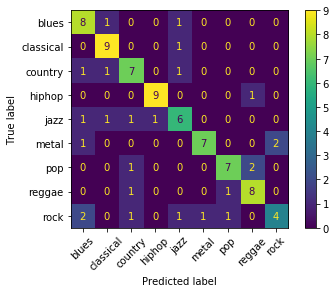

In [163]:
plot_confusion_matrix(modelsvm, X_test, y_test, display_labels=labels,xticks_rotation=45)

### Random Forest 

In [160]:
rf=RandomForestClassifier(n_estimators=19)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
ypredrf=rf.predict(X_test)
print(classification_report(y_test, ypredrf))

              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.75      0.90      0.82        10
           2       0.47      0.70      0.56        10
           3       0.75      0.60      0.67        10
           4       0.71      0.50      0.59        10
           5       0.86      0.60      0.71        10
           6       0.73      0.80      0.76        10
           7       0.55      0.60      0.57        10
           8       0.50      0.40      0.44        10

    accuracy                           0.62        90
   macro avg       0.64      0.62      0.62        90
weighted avg       0.64      0.62      0.62        90



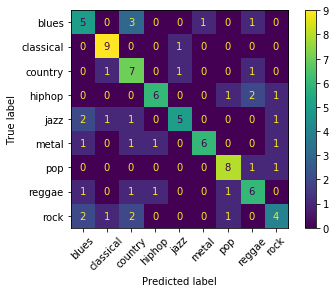

In [164]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=labels,xticks_rotation=45)

### In conclusion SVM did better that Random forest a sure thing that we need more tuning and feature engineering to improve performance, will be put on my todo list ^_^

###  I'd try KNN 

In [188]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [189]:
ypredknn=knn.predict(X_test)
print(classification_report(y_test, ypredknn))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.73      0.80      0.76        10
           2       0.40      0.60      0.48        10
           3       0.62      0.80      0.70        10
           4       0.71      0.50      0.59        10
           5       1.00      0.70      0.82        10
           6       0.75      0.60      0.67        10
           7       0.54      0.70      0.61        10
           8       0.57      0.40      0.47        10

    accuracy                           0.63        90
   macro avg       0.66      0.63      0.64        90
weighted avg       0.66      0.63      0.64        90



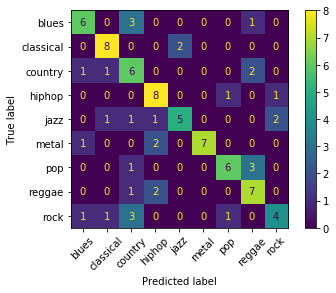

In [190]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=labels,xticks_rotation=45)